# Lab Segmentation 2

In [1]:
from commonfunctions import *
import skimage.io as io
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Experiment 1

In [50]:
def getThreshold(img):
    newImg = np.copy(img)
    newImg = newImg*255
    newImg = newImg.astype('uint8')
    # Histogram of image
    imgHist = np.histogram(newImg, bins=256)
    imgHist = imgHist[0]
    # Dimensions of original image
    imgSize = newImg.shape[0] * newImg.shape[1]
    # T = np.zeros((256))

    
    # Cumulative histogram
    H_c = np.zeros((256))
    H_c[0] = imgHist[0]
    H_c[255] = imgSize
    for p in range(1,imgHist.shape[0]-1):
        H_c[p] = H_c[p-1] + imgHist[p]
        # T[p] = round((255)*H_c[p]/imgSize)
    # Tinit = 𝑟𝑜𝑢𝑛𝑑((Σ𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝐺𝑟𝑒𝑦𝐿𝑒𝑣𝑒𝑙𝑠Per𝑘=0𝑔𝑟𝑒𝑦𝐿𝑒𝑣𝑒𝑙𝑘 ∗ 𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝑃𝑖𝑥𝑒𝑙𝑠𝑘) / 𝑡𝑜𝑡𝑎𝑙 𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑝𝑖𝑥𝑒𝑙𝑠 𝑖𝑛 𝑡ℎ𝑒 𝑖𝑚𝑎𝑔𝑒. )
    # Calculating Σ𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝐺𝑟𝑒𝑦𝐿𝑒𝑣𝑒𝑙𝑠Per𝑘=0𝑔𝑟𝑒𝑦𝐿𝑒𝑣𝑒𝑙𝑘 
    sum = 0
    for k in range(imgHist.shape[0]):
        # k = 𝐺𝑟𝑒𝑦𝐿𝑒𝑣𝑒𝑙𝑘
        # imgHist[k] = 𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝐺𝑟𝑒𝑦𝐿𝑒𝑣𝑒𝑙𝑠Per𝑘
        sum = sum + k * imgHist[k]
    Tinit = round(sum/H_c[-1])
    TinitPrev = -1
    while True:
        # print(Tinit)
        # Calculating Tinit from 0 to Tinit - 1
        sum1=0
        for i in range(Tinit):
            sum1 = sum1 + i * imgHist[i]
        H_c1 = H_c[0:Tinit] 
        Tinit1 = round(sum1/H_c1[-1])
        # print("Tinit1 : "+str(Tinit1))
        # Calculating Tinit from Tinit to last grey level
        sum2=0
        for i in range(Tinit,imgHist.shape[0]):
            sum2 = sum2 + i * imgHist[i]

        # H_c2 = H_c[Tinit: 255] 
        Tinit2 = round(sum2/(H_c[-1] - H_c1[-1]))
        # print("Tinit2 : "+str(Tinit2))
        Tinit = (Tinit1+Tinit2)//2
        if Tinit == TinitPrev:
            break
        TinitPrev = Tinit
    return Tinit    

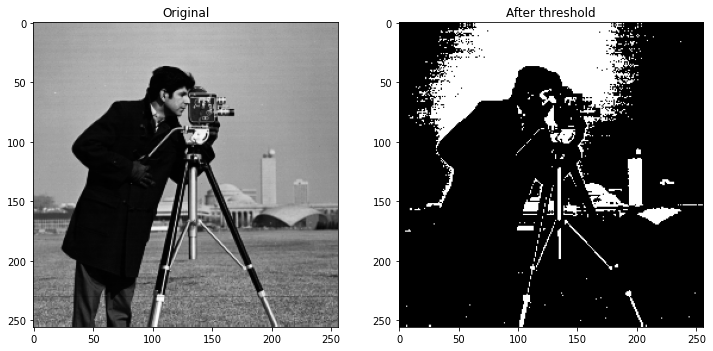

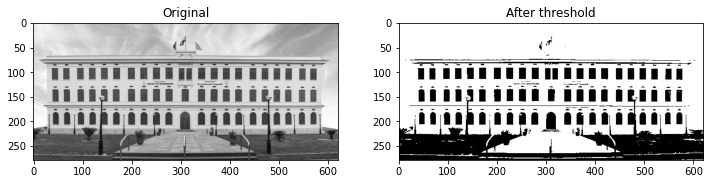

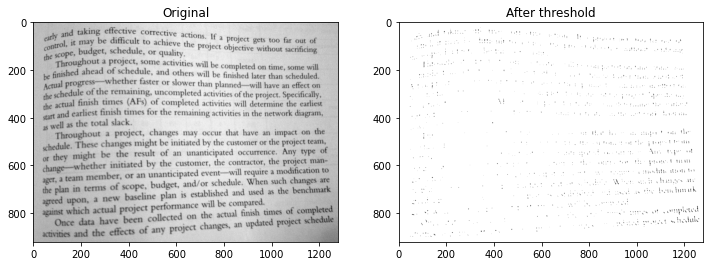

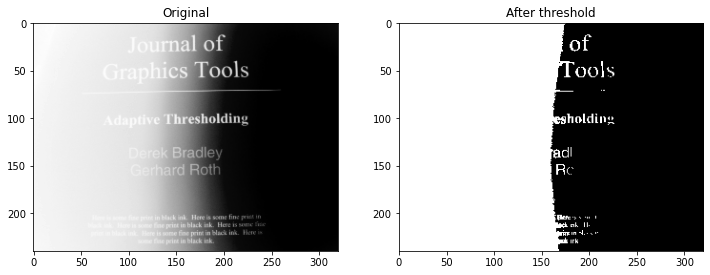

In [52]:
cameramanImg = io.imread("./cameraman.png")
T_cameramanImg =  getThreshold(cameramanImg)
newCameramanImg = np.where(cameramanImg > T_cameramanImg,1,0)
show_images([cameramanImg, newCameramanImg], ["Original", "After threshold"])

CufeImg = rgb2gray(io.imread("./cufe.png"))
CufeImg = CufeImg*255
CufeImg = CufeImg.astype('uint8')
T_CufeImg =  getThreshold(CufeImg)
newCufeImg = np.where(CufeImg > T_CufeImg,1,0)
show_images([CufeImg, newCufeImg], ["Original", "After threshold"])

Book1Img = rgb2gray(io.imread("./book1.png"))
Book1Img = Book1Img*255
Book1Img = Book1Img.astype('uint8')
T_Book1Img =  getThreshold(Book1Img)
newBook1Img = np.where(Book1Img > T_Book1Img,1,0)
show_images([Book1Img, newBook1Img], ["Original", "After threshold"])

BookImg = io.imread("./book.png")
BookImg = BookImg*255
BookImg = BookImg.astype('uint8')
T_BookImg =  getThreshold(BookImg)
newBookImg = np.where(BookImg > T_BookImg,1,0)
show_images([BookImg, newBookImg], ["Original", "After threshold"])


## Experiment 2